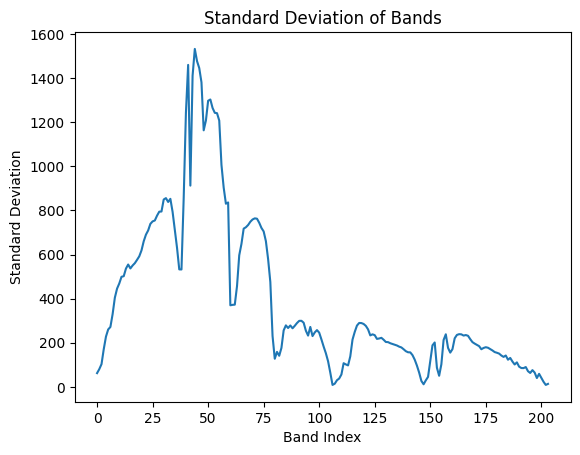

The band with maximum information is Band 45


In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt



salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

reshaped_data = np.reshape(salinas, (salinas.shape[0] * salinas.shape[1], salinas.shape[2]))

band_std_dev = np.std(reshaped_data, axis=0)


max_info_band = np.argmax(band_std_dev)


plt.plot(band_std_dev)
plt.xlabel('Band Index')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Bands')
plt.show()

print(f"The band with maximum information is Band {max_info_band + 1}")

In [3]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt


salinas_data = loadmat('/content/salinas_corrected.mat')

keys = salinas_data.keys()

print(keys)
print(salinas)

dict_keys(['__header__', '__version__', '__globals__', 'salinas_corrected'])
[[[290 381 585 ...  36  11  17]
  [290 381 519 ...  36  11  15]
  [290 381 585 ...  30  11  11]
  ...
  [373 482 594 ...   6   4   0]
  [373 482 659 ...   0   0   5]
  [305 393 655 ...   1   1  -3]]

 [[379 400 600 ...  32  11  15]
  [308 400 535 ...  28  15  13]
  [379 483 535 ...  26   5  15]
  ...
  [376 477 590 ...   3   0  -5]
  [376 477 590 ...   7   0  13]
  [305 393 655 ...   1   1  -3]]

 [[369 495 604 ...  29   9  17]
  [298 411 604 ...  23   5  13]
  [298 411 670 ...  27   7  13]
  ...
  [447 468 664 ...   4   7   0]
  [305 468 664 ...  14   7   2]
  [447 384 664 ...   6   1   4]]

 ...

 [[379 383 540 ...   6   5   9]
  [308 383 540 ...   8   5   5]
  [379 383 540 ...   4  -2   7]
  ...
  [367 387 661 ...  39  17  23]
  [367 470 661 ...  43  15  23]
  [438 470 596 ...  41  13  27]]

 [[314 479 604 ...   8   5   0]
  [314 396 539 ...   4   3   2]
  [385 396 539 ...   2   1   0]
  ...
  [367 387 661 

Lacunarity for Band 45 is: 0.1892473941964392


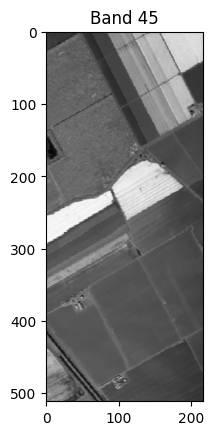

In [4]:
import numpy as np
from scipy.ndimage import variance
from scipy.io import loadmat
import matplotlib.pyplot as plt


salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']



band_45 = salinas[:, :, 45]


lacunarity_value = np.var(band_45)/np.mean(band_45)**2

print(f"Lacunarity for Band 45 is: {lacunarity_value}")


plt.imshow(band_45, cmap='gray')
plt.title('Band 45')
plt.show()

Gliding Box Lacunarity for Band 45 with box size 2: -0.16555495306552487
Gliding Box Lacunarity for Band 45 with box size 4: -0.02729007847688355
Gliding Box Lacunarity for Band 45 with box size 8: 0.2293618731158222
Gliding Box Lacunarity for Band 45 with box size 16: -0.32866552465626336
Gliding Box Lacunarity for Band 45 with box size 32: 0.16571558325902405


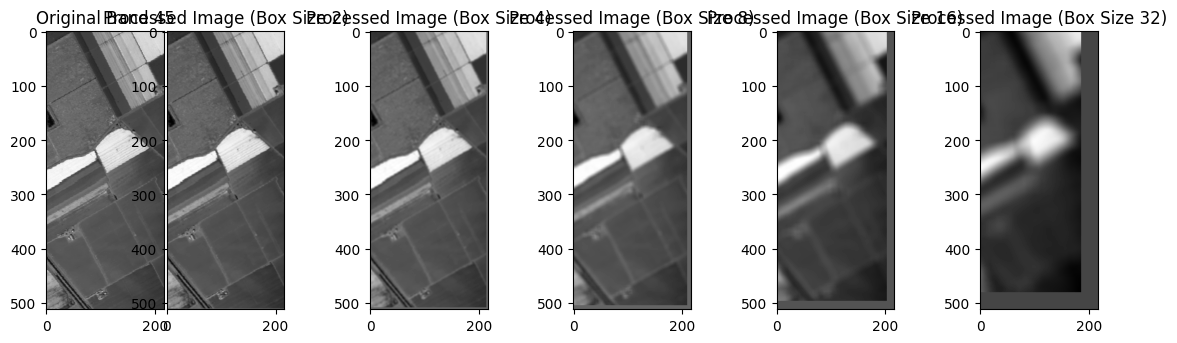

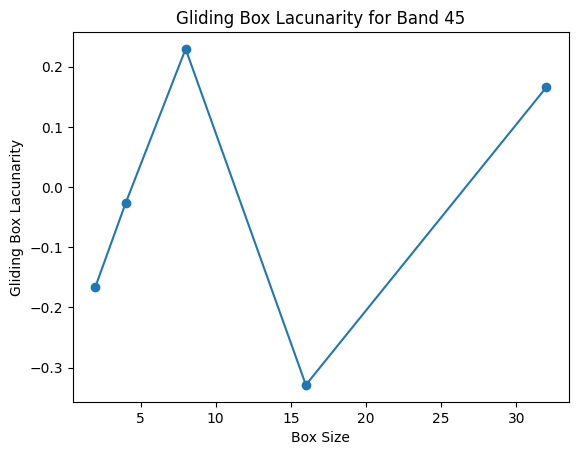

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler


salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

band_number = 45
selected_band = salinas[:, :, band_number]


selected_band_normalized = StandardScaler().fit_transform(selected_band.reshape(-1, 1)).reshape(selected_band.shape)


box_sizes = [2, 4, 8, 16, 32]


def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)/np.mean(unique_labels)
                processed_image[i, j] = np.mean(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images


lacunarity_values, processed_images = gliding_box_lacunarity(selected_band_normalized, box_sizes)

for i, size in enumerate(box_sizes):
    print(f"Gliding Box Lacunarity for Band {band_number} with box size {size}: {lacunarity_values[i]}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(selected_band_normalized, cmap='gray')
plt.title(f'Original Band {band_number}')

for i, size in enumerate(box_sizes):
    plt.subplot(1, len(box_sizes) + 1, i+2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image (Box Size {size})')

plt.tight_layout()
plt.show()

plt.plot(box_sizes, lacunarity_values, marker='o')
plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title(f'Gliding Box Lacunarity for Band {band_number}')
plt.show()

Gliding Box Lacunarity for Band 45 with box size 2: 0.01860472218580084
Gliding Box Lacunarity for Band 45 with box size 4: 0.04941407232980801
Gliding Box Lacunarity for Band 45 with box size 8: 0.09722770370949345
Gliding Box Lacunarity for Band 45 with box size 16: 0.17922475010405026
Gliding Box Lacunarity for Band 45 with box size 32: 0.31178481520468965


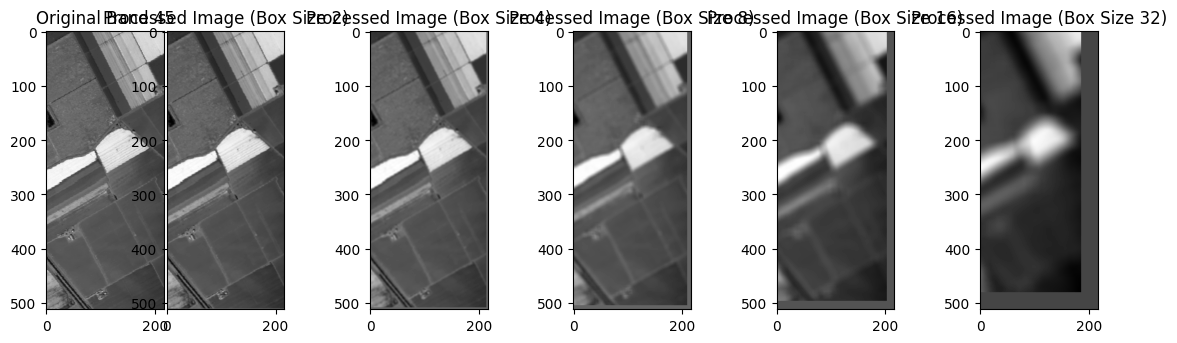

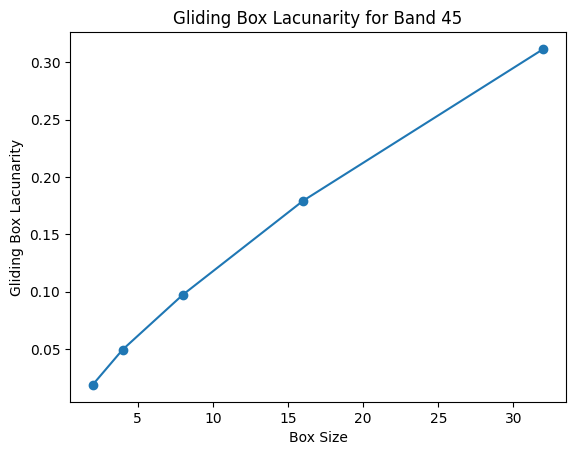

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

band_number = 45
selected_band = salinas[:, :, band_number]

selected_band_normalized = StandardScaler().fit_transform(selected_band.reshape(-1, 1)).reshape(selected_band.shape)

box_sizes = [2, 4, 8, 16, 32]

def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)
                processed_image[i, j] = np.mean(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

lacunarity_values, processed_images = gliding_box_lacunarity(selected_band_normalized, box_sizes)

for i, size in enumerate(box_sizes):
    print(f"Gliding Box Lacunarity for Band {band_number} with box size {size}: {lacunarity_values[i]}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(selected_band_normalized, cmap='gray')
plt.title(f'Original Band {band_number}')

for i, size in enumerate(box_sizes):
    plt.subplot(1, len(box_sizes) + 1, i+2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image (Box Size {size})')

plt.tight_layout()
plt.show()

plt.plot(box_sizes, lacunarity_values, marker='o')
plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title(f'Gliding Box Lacunarity for Band {band_number}')
plt.show()


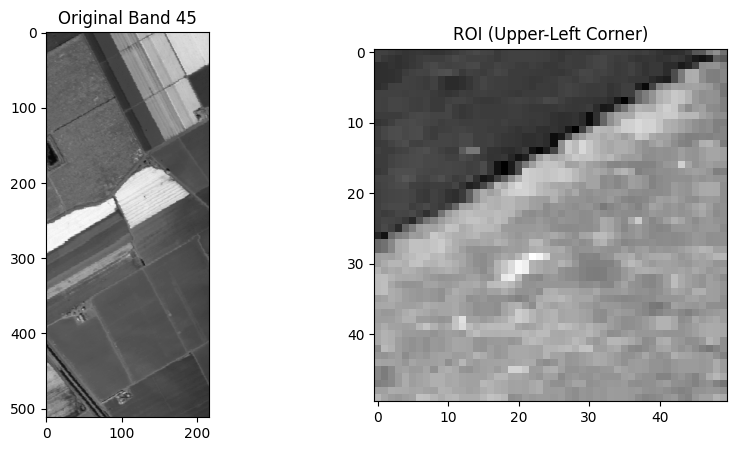

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


salinas_data = loadmat('/content/Salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']


band_number = 45
band_45 = salinas[:, :, band_number]


x, y, roi_width, roi_height = 0, 0, 50, 50


roi = band_45[y:y+roi_height, x:x+roi_width]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(band_45, cmap='gray')
plt.title('Original Band 45')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Upper-Left Corner)')

plt.show()

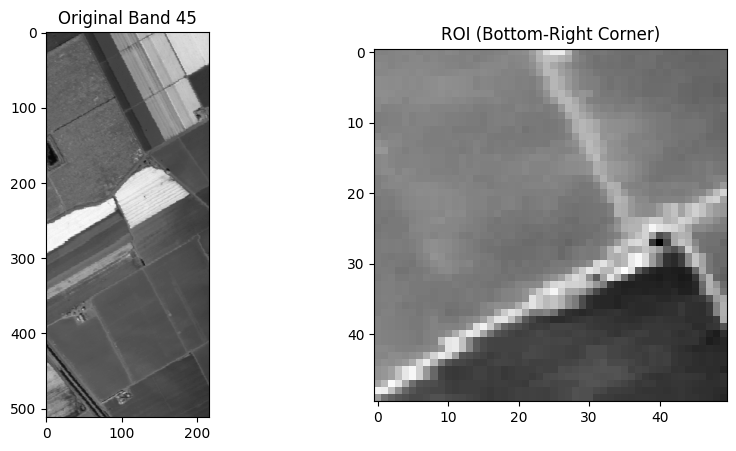

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

band_number = 45
band_45 =salinas[:, :, band_number]


x, y, roi_width, roi_height = 150, 400, 50, 50


roi = band_45[y:y+roi_height, x:x+roi_width]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(band_45, cmap='gray')
plt.title('Original Band 45')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Bottom-Right Corner)')

plt.show()

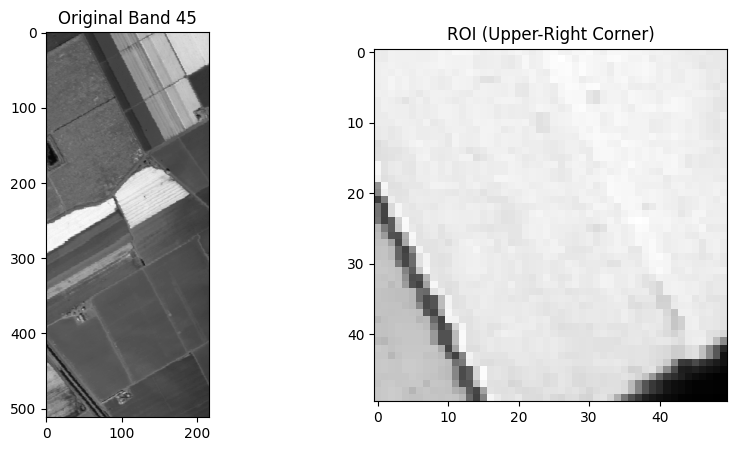

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

band_number = 45
band_45 = salinas[:, :, band_number]

height, width = band_45.shape

roi_width, roi_height = 50, 50
x = width - roi_width
y = 0

roi = band_45[y:y+roi_height, x:x+roi_width]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(band_45, cmap='gray')
plt.title('Original Band 45')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Upper-Right Corner)')

plt.show()


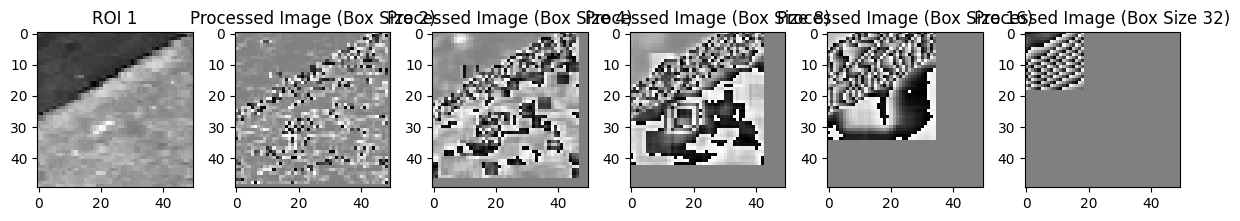

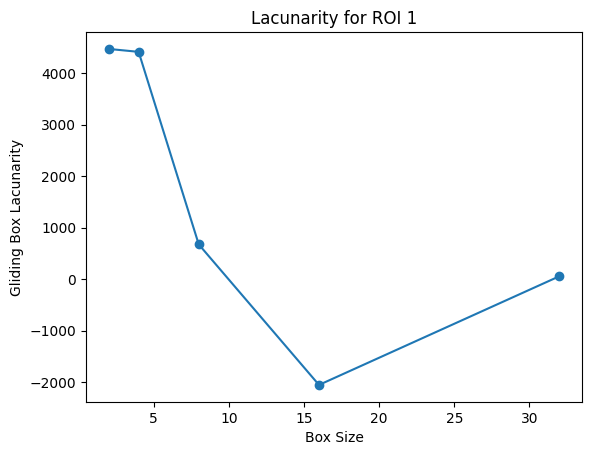

Lacunarity values for ROI 1: [4467.9756, 4411.224, 675.2348, -2050.1592, 58.9108]


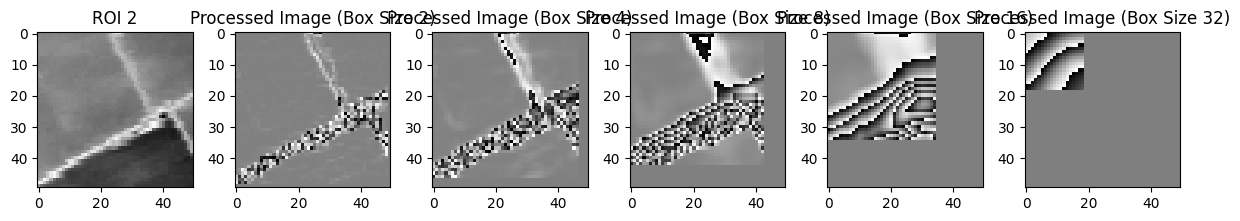

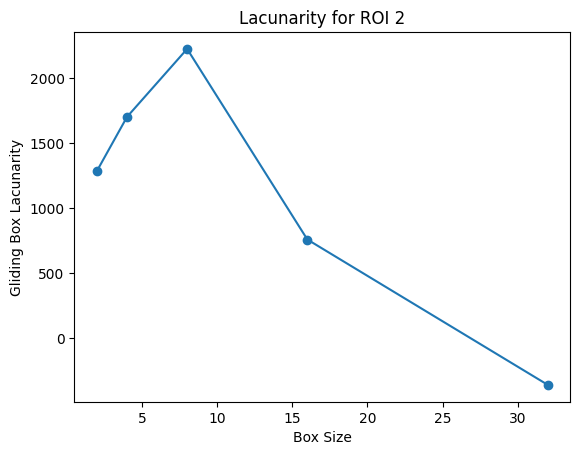

Lacunarity values for ROI 2: [1288.5792, 1704.3348, 2227.4436, 761.018, -357.48]


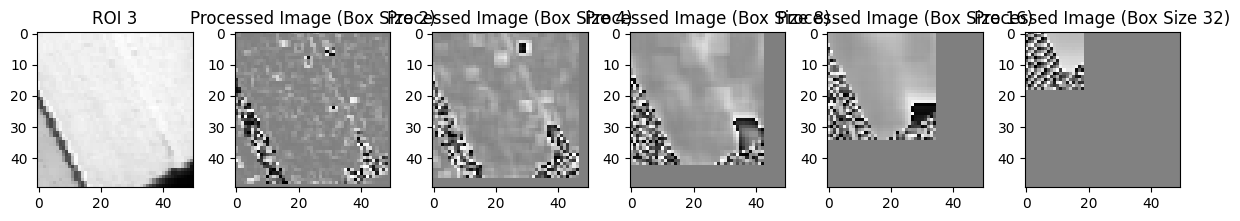

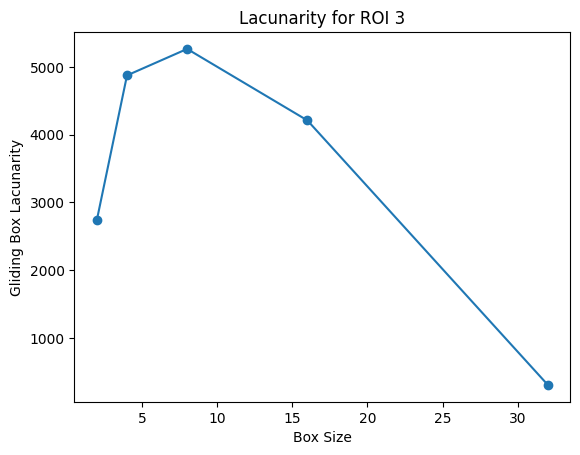

Lacunarity values for ROI 3: [2746.7872, 4876.6924, 5267.6372, 4211.8328, 305.2308]


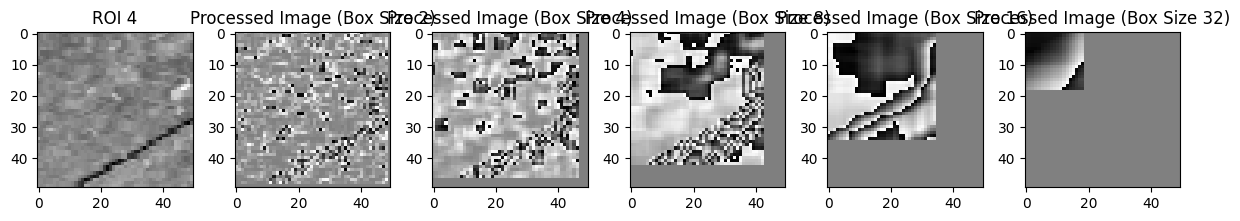

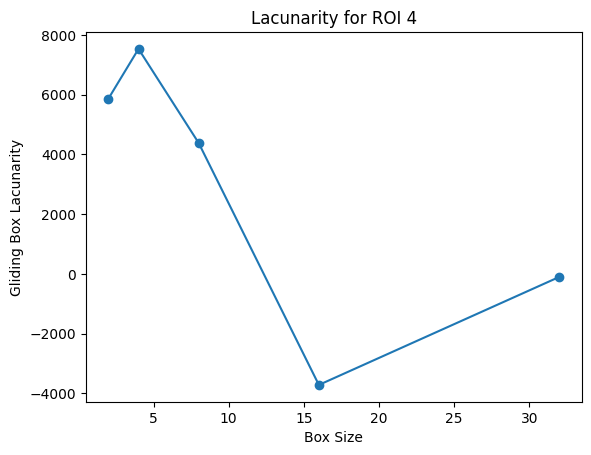

Lacunarity values for ROI 4: [5869.424, 7532.844, 4386.114, -3716.8176, -99.7656]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)
                processed_image[i, j] = np.var(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

band_number = 45
band_45 = salinas[:, :, band_number]

height, width = band_45.shape

roi_params = [
    {"x": 0, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 150, "y": 400, "roi_width": 50, "roi_height": 50},
    {"x": width - 50, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 20, "y": 70, "roi_width": 50, "roi_height": 50}
]

box_sizes = [2, 4, 8, 16, 32]

for idx, params in enumerate(roi_params):
    x, y, roi_width, roi_height = params["x"], params["y"], params["roi_width"], params["roi_height"]
    roi = band_45[y:y+roi_height, x:x+roi_width]

    lacunarity_values, processed_images = gliding_box_lacunarity(roi, box_sizes)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(box_sizes) + 1, 1)
    plt.imshow(roi, cmap='gray')
    plt.title(f'ROI {idx+1}')

    for i, size in enumerate(box_sizes):
        plt.subplot(1, len(box_sizes) + 1, i+2)
        plt.imshow(processed_images[i], cmap='gray')
        plt.title(f'Processed Image (Box Size {size})')

    plt.tight_layout()
    plt.show()

    plt.plot(box_sizes, lacunarity_values, marker='o')
    plt.xlabel('Box Size')
    plt.ylabel('Gliding Box Lacunarity')
    plt.title(f'Lacunarity for ROI {idx+1}')
    plt.show()

    print(f'Lacunarity values for ROI {idx+1}: {lacunarity_values}')


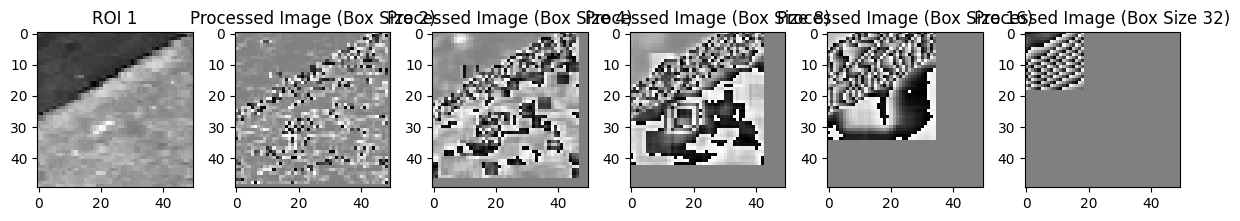

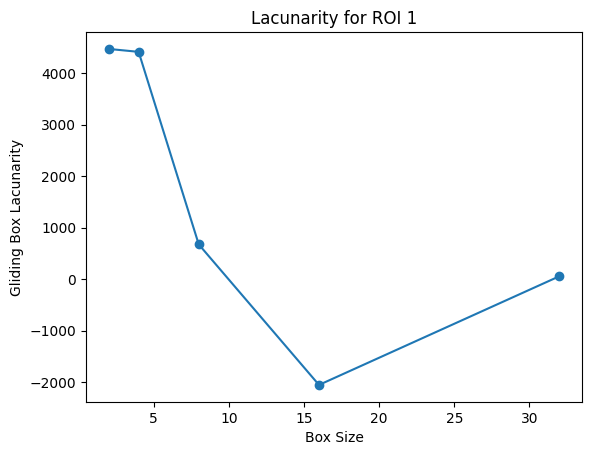

Lacunarity values for ROI 1: [4467.9756, 4411.224, 675.2348, -2050.1592, 58.9108]


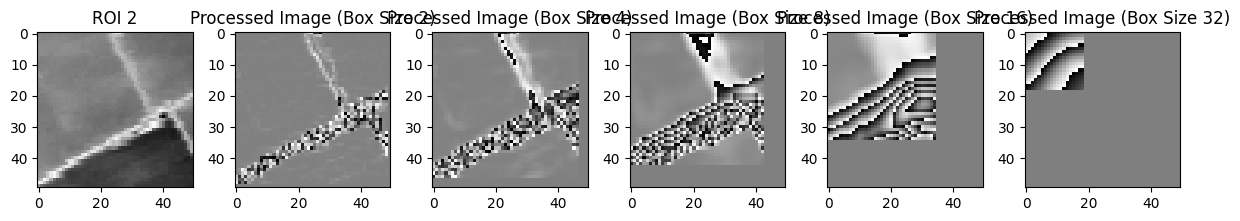

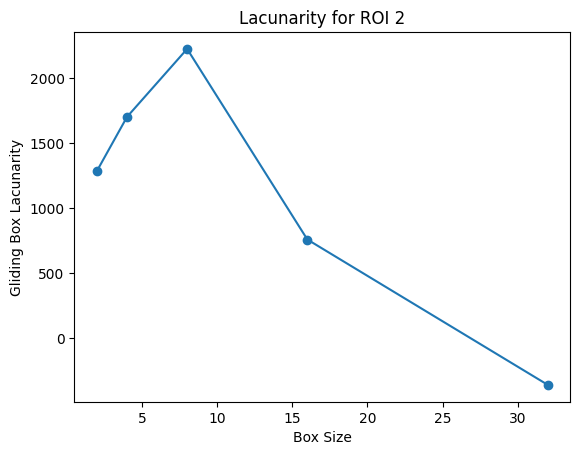

Lacunarity values for ROI 2: [1288.5792, 1704.3348, 2227.4436, 761.018, -357.48]


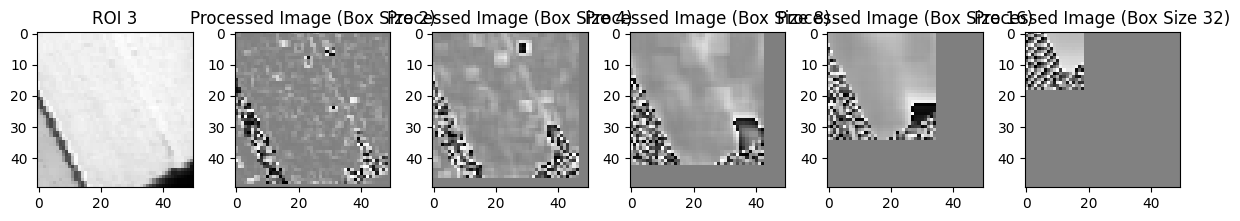

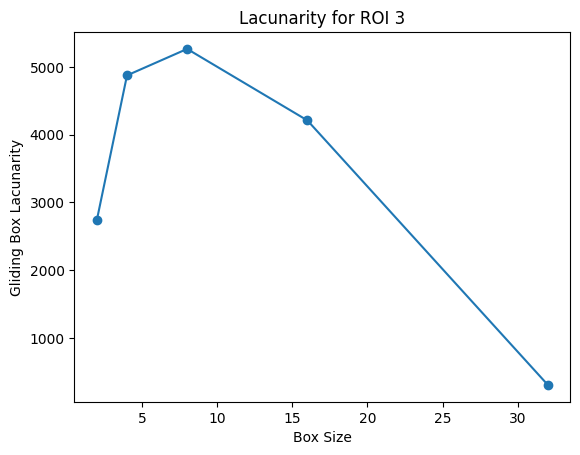

Lacunarity values for ROI 3: [2746.7872, 4876.6924, 5267.6372, 4211.8328, 305.2308]


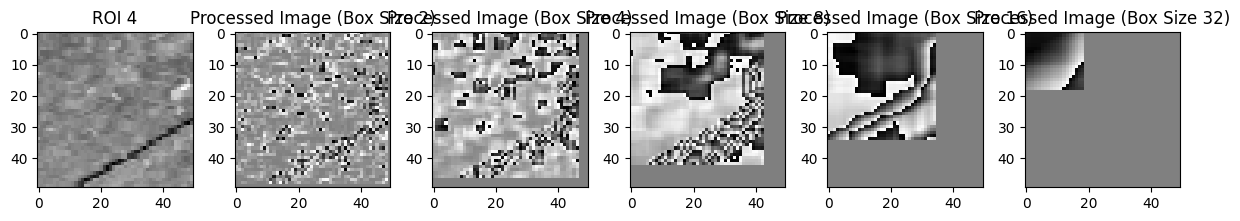

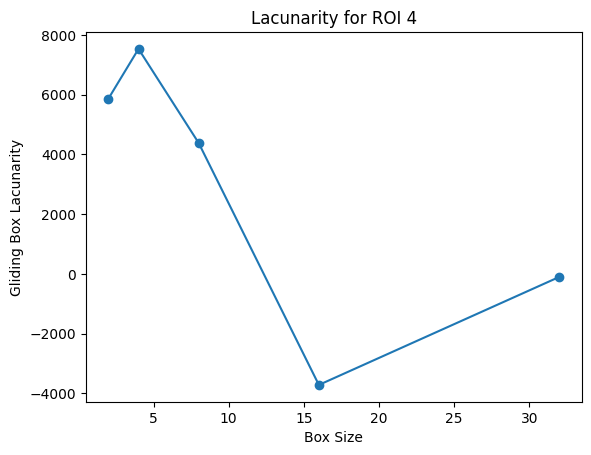

Lacunarity values for ROI 4: [5869.424, 7532.844, 4386.114, -3716.8176, -99.7656]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)
                processed_image[i, j] = np.var(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

band_number = 45
band_45 = salinas[:, :, band_number]

height, width = band_45.shape

roi_params = [
    {"x": 0, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 150, "y": 400, "roi_width": 50, "roi_height": 50},
    {"x": width - 50, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 20, "y": 70, "roi_width": 50, "roi_height": 50}
]

box_sizes = [2, 4, 8, 16, 32]

for idx, params in enumerate(roi_params):
    x, y, roi_width, roi_height = params["x"], params["y"], params["roi_width"], params["roi_height"]
    roi = band_45[y:y+roi_height, x:x+roi_width]

    lacunarity_values, processed_images = gliding_box_lacunarity(roi, box_sizes)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(box_sizes) + 1, 1)
    plt.imshow(roi, cmap='gray')
    plt.title(f'ROI {idx+1}')

    for i, size in enumerate(box_sizes):
        plt.subplot(1, len(box_sizes) + 1, i+2)
        plt.imshow(processed_images[i], cmap='gray')
        plt.title(f'Processed Image (Box Size {size})')

    plt.tight_layout()
    plt.show()

    plt.plot(box_sizes, lacunarity_values, marker='o')
    plt.xlabel('Box Size')
    plt.ylabel('Gliding Box Lacunarity')
    plt.title(f'Lacunarity for ROI {idx+1}')
    plt.show()

    print(f'Lacunarity values for ROI {idx+1}: {lacunarity_values}')


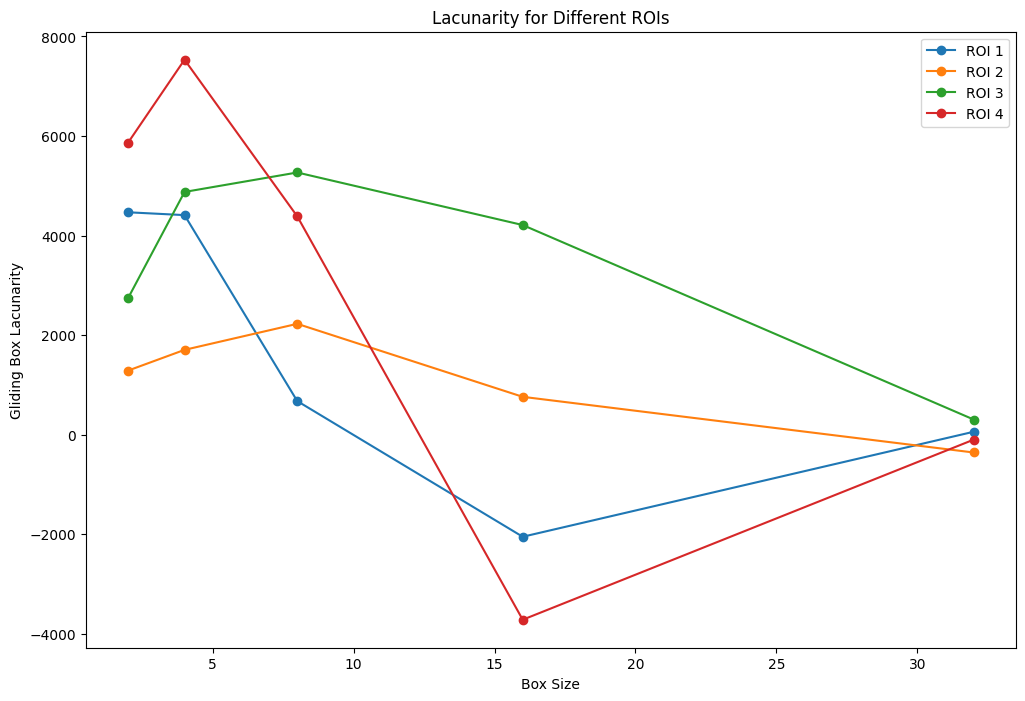

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)
                processed_image[i, j] = np.var(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

salinas_data = loadmat('/content/salinas_corrected.mat')
salinas = salinas_data['salinas_corrected']

band_number = 45
band_45 = salinas[:, :, band_number]

height, width = band_45.shape

roi_params = [
    {"x": 0, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 150, "y": 400, "roi_width": 50, "roi_height": 50},
    {"x": width - 50, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 20, "y": 70, "roi_width": 50, "roi_height": 50}
]

box_sizes = [2, 4, 8, 16, 32]

all_lacunarity_values = []

for idx, params in enumerate(roi_params):
    x, y, roi_width, roi_height = params["x"], params["y"], params["roi_width"], params["roi_height"]
    roi = band_45[y:y+roi_height, x:x+roi_width]

    lacunarity_values, processed_images = gliding_box_lacunarity(roi, box_sizes)

    all_lacunarity_values.append(lacunarity_values)

plt.figure(figsize=(12, 8))

for idx, lacunarity_values in enumerate(all_lacunarity_values):
    plt.plot(box_sizes, lacunarity_values, marker='o', label=f'ROI {idx+1}')

plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title('Lacunarity for Different ROIs')
plt.legend()
plt.show()
